# Indroduction
### Rainfall Prediction is one of the difficult and uncertain tasks that have a significant impact on human society. Timely and accurate forecasting can proactively help reduce human and financial loss. This study presents a set of experiments that involve the use of common machine learning techniques to create models that can predict whether it will rain tomorrow or not based on the weather data for that day in major cities in Australia

## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Data set overview

In [2]:
data = pd.read_csv(r"C:\Users\Mohd Anzil\Downloads\weather.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2009-10-18,Townsville,22.5,30.8,0.0,10.8,10.3,E,50.0,ESE,...,63.0,1018.1,1015.7,4.0,1.0,28.3,28.4,No,0.0,No
1,2014-04-20,MountGinini,-0.2,9.8,0.0,NaN,NaN,SW,35.0,W,...,80.0,NaN,NaN,NaN,NaN,1.5,8.2,No,0.0,No
2,2013-05-11,Dartmoor,16.4,25.5,0.0,8.0,4.9,N,52.0,N,...,31.0,1022.9,1017.8,NaN,NaN,18.3,25.0,No,6.4,Yes
3,2016-07-25,Cobar,3.3,15.0,0.0,1.8,NaN,WSW,31.0,W,...,57.0,1019.8,1017.9,NaN,1.0,8.6,14.2,No,0.0,No
4,2014-04-09,Williamtown,12.0,25.4,0.0,2.4,8.2,ESE,31.0,NaN,...,54.0,1020.9,1017.8,1.0,5.0,20.7,23.6,No,0.0,No


In [4]:
data.shape

(142192, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142192 entries, 0 to 142191
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142192 non-null  object 
 1   Location       142192 non-null  object 
 2   MinTemp        141501 non-null  float64
 3   MaxTemp        141874 non-null  float64
 4   Rainfall       140420 non-null  float64
 5   Evaporation    80969 non-null   float64
 6   Sunshine       74520 non-null   float64
 7   WindGustDir    132568 non-null  object 
 8   WindGustSpeed  132623 non-null  float64
 9   WindDir9am     132621 non-null  object 
 10  WindDir3pm     138208 non-null  object 
 11  WindSpeed9am   140807 non-null  float64
 12  WindSpeed3pm   139506 non-null  float64
 13  Humidity9am    140289 non-null  float64
 14  Humidity3pm    138466 non-null  float64
 15  Pressure9am    128060 non-null  float64
 16  Pressure3pm    128078 non-null  float64
 17  Cloud9am       89325 non-null

In [6]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            691
MaxTemp            318
Rainfall          1772
Evaporation      61223
Sunshine         67672
WindGustDir       9624
WindGustSpeed     9569
WindDir9am        9571
WindDir3pm        3984
WindSpeed9am      1385
WindSpeed3pm      2686
Humidity9am       1903
Humidity3pm       3726
Pressure9am      14132
Pressure3pm      14114
Cloud9am         52867
Cloud3pm         55863
Temp9am           1022
Temp3pm           2842
RainToday         1772
RISK_MM              0
RainTomorrow         0
dtype: int64

## Data Cleaning & Preprocessing

In [7]:
# Drop columns with excessive missing values
data = data.drop(columns=["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"])



In [8]:
# drop unnecessary columns
data = data.drop(columns=["Date","RISK_MM"])

In [9]:
# Fill numerical columns with mean
num_cols = ["MinTemp", "MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
            "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill categorical columns with mode
cat_cols = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\Mohd Anzil\AppData\Local\Temp\ipykernel_11888\234506862.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\Mohd Anzil\AppData\Local\Temp\ipykernel_11888\234506862.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [10]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [11]:
print("Duplicate Rows:", data.duplicated().sum())


Duplicate Rows: 30394


In [12]:
data = data.drop_duplicates()


In [13]:
print("Duplicate Rows After Removal:", data.duplicated().sum()) 


Duplicate Rows After Removal: 0


In [14]:
print(data.index)


Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       142172, 142174, 142175, 142176, 142177, 142178, 142179, 142180, 142181,
       142186],
      dtype='int64', length=111798)


In [15]:
data.reset_index(drop=True, inplace=True)


In [16]:
print(data.index)


RangeIndex(start=0, stop=111798, step=1)


### Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

# Apply Label Encoding
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])


In [18]:
data["Location"] = encoder.fit_transform(data["Location"])


In [19]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,39,22.5,30.8,0.0,0,50.0,2,1,24.0,33.0,56.0,63.0,1018.100000,1015.700000,28.3,28.4,0,0
1,23,-0.2,9.8,0.0,12,35.0,13,13,19.0,17.0,98.0,80.0,1016.937319,1014.612205,1.5,8.2,0,0
2,12,16.4,25.5,0.0,3,52.0,3,3,13.0,22.0,48.0,31.0,1022.900000,1017.800000,18.3,25.0,0,1
3,10,3.3,15.0,0.0,15,31.0,13,7,15.0,17.0,67.0,57.0,1019.800000,1017.900000,8.6,14.2,0,0
4,45,12.0,25.4,0.0,2,31.0,3,2,0.0,20.0,77.0,54.0,1020.900000,1017.800000,20.7,23.6,0,0


####  Check for Outliers Using Boxplots 

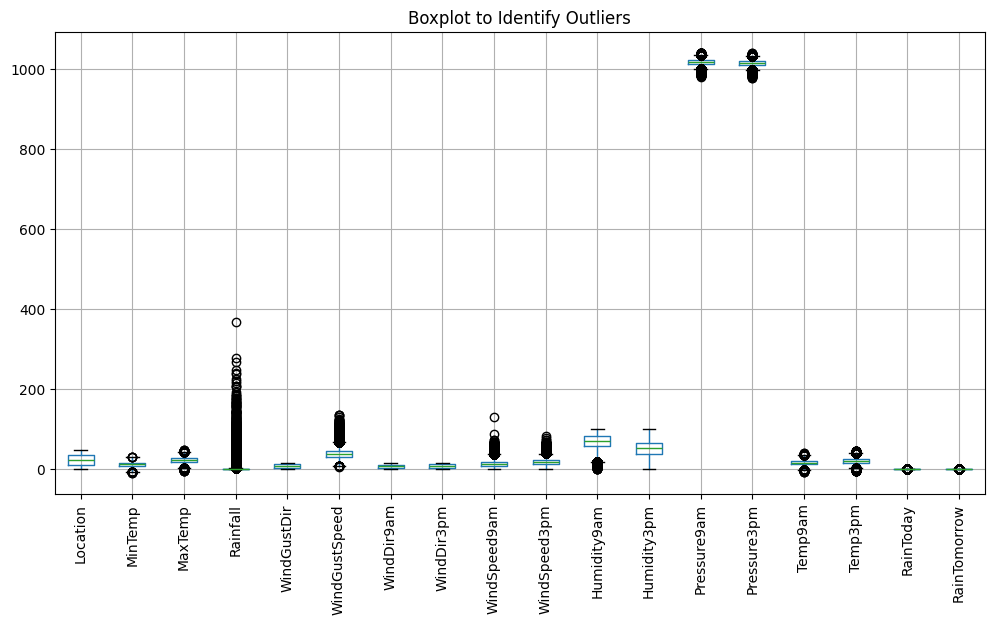

In [20]:
# Select numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for numerical features
plt.figure(figsize=(12, 6))
data[num_cols].boxplot(rot=90)  # Rotate labels for better visibility
plt.title("Boxplot to Identify Outliers")
plt.show()

In [21]:
for col in num_cols:
    q1 = data[col].quantile(0.01)  # 1st percentile
    q99 = data[col].quantile(0.99)  # 99th percentile
    data = data[(data[col] >= q1) & (data[col] <= q99)]

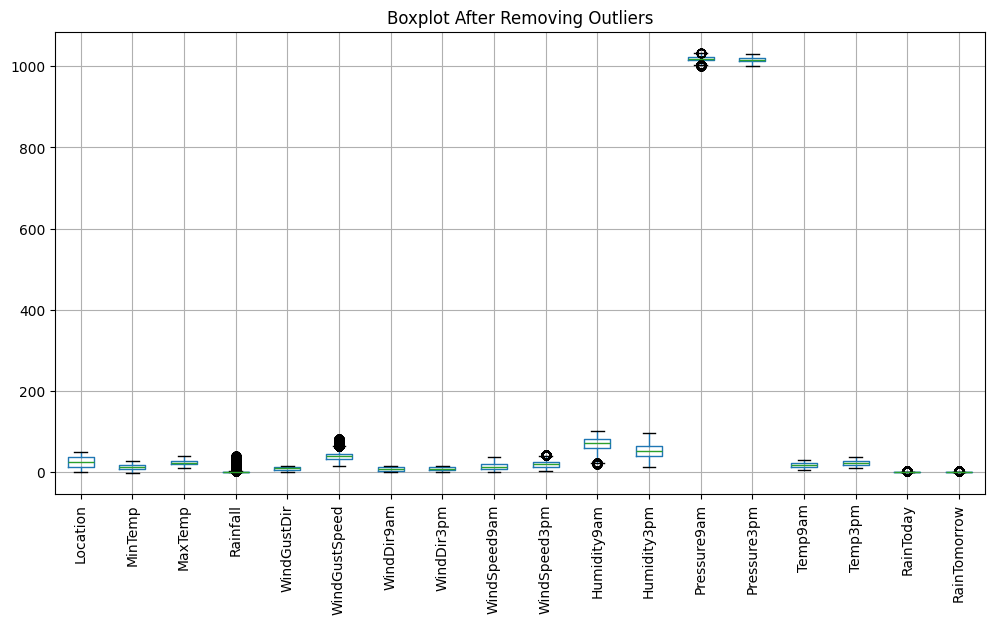

In [22]:
# Plot boxplots after outlier removal
plt.figure(figsize=(12, 6))
data[num_cols].boxplot(rot=90)
plt.title("Boxplot After Removing Outliers")
plt.show()

In [23]:
print("New shape after outlier removal:", data.shape)


New shape after outlier removal: (92216, 18)


### Correlation Heatmap
This shows relationships between variables:

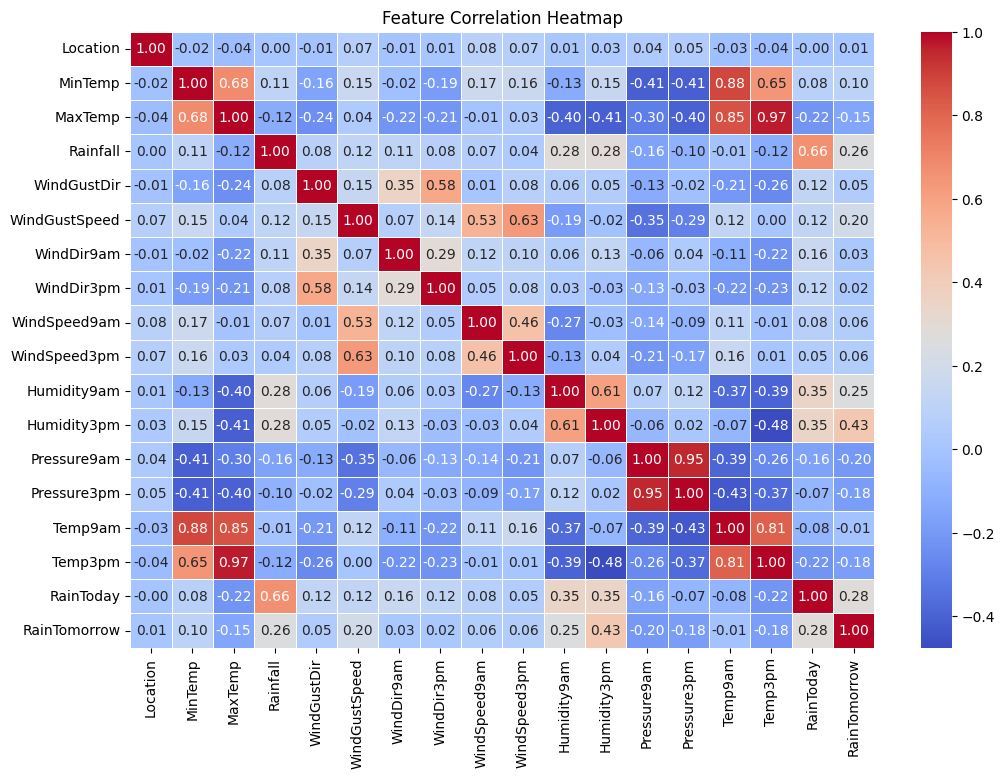

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\Mohd Anzil\AppData\Local\Temp\ipykernel_11888\945588696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["RainTomorrow"], palette="coolwarm")


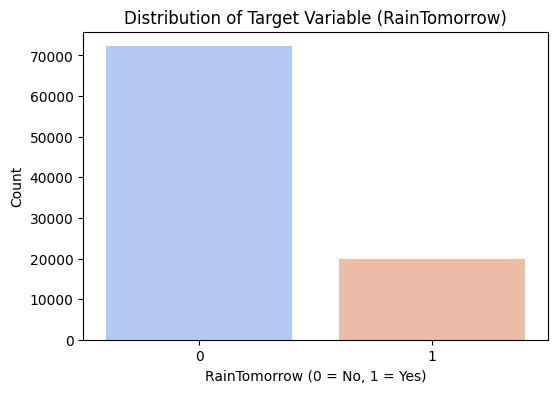

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=data["RainTomorrow"], palette="coolwarm")
plt.title("Distribution of Target Variable (RainTomorrow)")
plt.xlabel("RainTomorrow (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [26]:

print(data["RainTomorrow"].value_counts(normalize=True))  # Shows % of each class


RainTomorrow
0    0.783411
1    0.216589
Name: proportion, dtype: float64


In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into X (features) and y (target)
X = data.drop(columns=["RainTomorrow"])
y = data["RainTomorrow"]

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only on training data
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_resampled.value_counts())  # Should now be balanced


RainTomorrow
0    57794
1    57794
Name: count, dtype: int64


C:\Users\Mohd Anzil\AppData\Local\Temp\ipykernel_11888\1655356422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette="coolwarm")


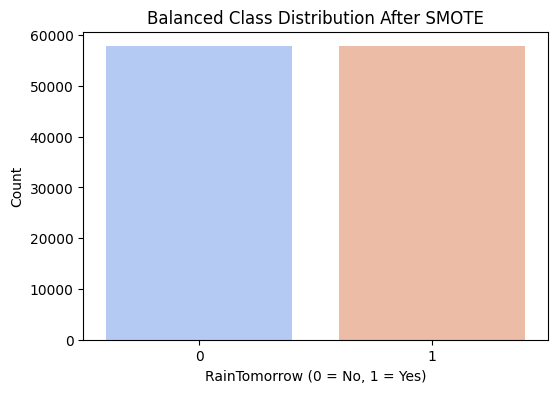

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled, palette="coolwarm")
plt.title("Balanced Class Distribution After SMOTE")
plt.xlabel("RainTomorrow (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


### Splitting

In [29]:
# Define features (X) and target (y)
X = data.drop(columns=["RainTomorrow"])
y = data["RainTomorrow"]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (73772, 17) (73772,)
Testing data shape: (18444, 17) (18444,)


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test) 


### Model Building

#### 1. KNN

In [32]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train_scaled, y_train_resampled)  #training
y_pred_knn=classifier_knn.predict(X_test_scaled)

In [33]:
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
result=confusion_matrix(y_test,y_pred_knn)
print('Confusion Matrix:')
print(result)

Confusion Matrix:
[[10855  3594]
 [ 1141  2854]]


In [35]:
print("\n🔹 KNN Classification Report:\n", classification_report(y_test, y_pred_knn))



🔹 KNN Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82     14449
           1       0.44      0.71      0.55      3995

    accuracy                           0.74     18444
   macro avg       0.67      0.73      0.68     18444
weighted avg       0.80      0.74      0.76     18444



In [36]:
result2=accuracy_score(y_test,y_pred_knn)
print('Accuracy:',result2)

Accuracy: 0.7432769464324441


#### 2. Nave Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(X_train_scaled, y_train_resampled)   #training
y_pred_nb=model_nb.predict(X_test_scaled)

In [38]:
print("\n Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))



 Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84     14449
           1       0.47      0.66      0.55      3995

    accuracy                           0.77     18444
   macro avg       0.68      0.73      0.70     18444
weighted avg       0.80      0.77      0.78     18444



In [39]:
result3=accuracy_score(y_test,y_pred_nb)
print('Accuracy:',result3)

Accuracy: 0.7677835610496638


#### Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()  #by defualt gini
model_dt=model_dt.fit(X_train_scaled, y_train_resampled) #training
y_pred_dt=model_dt.predict(X_test_scaled)

In [41]:
result4=accuracy_score(y_test,y_pred_dt)
print('Accuracy:',result4)

Accuracy: 0.7657774886141835


In [42]:
# print the score on training and test set

print("Training set score:{:.4f}".format(model_dt.score(X_train,y_train)))
print("Test set score :{:.4f}".format(model_dt.score(X_test,y_test)))

Training set score:0.7834
Test set score :0.7834


C:\Users\Mohd Anzil\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Mohd Anzil\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [43]:
model_dt1=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model_dt1=model_dt1.fit(X_train_scaled, y_train_resampled) #predict the response for the test
y_pred_dt1=model_dt1.predict(X_test_scaled) #model accuracy , how often is the classifier
result5=accuracy_score(y_test,y_pred_dt1)
print('Accuracy:',result5)

Accuracy: 0.8012361743656473


#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier  #import decision tree classifier
model_rf=RandomForestClassifier(n_estimators=57,random_state=42)  
#train decision tree classifier
model_rf=model_rf.fit(X_train_scaled, y_train_resampled)
y_pred_rf=model_rf.predict(X_test_scaled)

In [45]:
print('Accuracy:',accuracy_score(y_test,y_pred_rf))

Accuracy: 0.8326284970722186


#### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_resampled)
y_pred_lr = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Model Accuracy: 0.7671

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84     14449
           1       0.48      0.74      0.58      3995

    accuracy                           0.77     18444
   macro avg       0.70      0.76      0.71     18444
weighted avg       0.82      0.77      0.78     18444


Confusion Matrix:
 [[11178  3271]
 [ 1024  2971]]


In [47]:
print('Accuracy of KNN Classifier:',accuracy_score(y_test,y_pred_knn))
print('Accuracy of Naive Bayes classifier:',accuracy_score(y_test,y_pred_nb))
print('Accuracy of Decision Tree Algorithm:',accuracy_score(y_test,y_pred_dt))
print('Accuracy of Random Forest:',accuracy_score(y_test,y_pred_rf))
print('Accuracy of Logistic Regression:',accuracy_score(y_test,y_pred_lr))

Accuracy of KNN Classifier: 0.7432769464324441
Accuracy of Naive Bayes classifier: 0.7677835610496638
Accuracy of Decision Tree Algorithm: 0.7657774886141835
Accuracy of Random Forest: 0.8326284970722186
Accuracy of Logistic Regression: 0.767132942962481


### Counclusion

Best Model for Rainfall Prediction
After evaluating multiple machine learning models, we found that:

* Random Forest Classifier achieved the highest accuracy of 83.26%.
* Naïve Bayes (76.77%) and Logistic Regression (76.71%) performed similarly.
* Decision Tree (76.31%) and KNN (74.33%) had lower accuracy.

Key Takeaways:

Random Forest performed the best because it combines multiple decision trees, reducing overfitting and improving accuracy.
Naïve Bayes and Logistic Regression performed well, suggesting that some features might have a strong probabilistic relationship with the target variable.
KNN had the lowest accuracy, likely because it is sensitive to feature scaling and high-dimensional data.